# Grid World  
- Each action is not entirely deterministic
    - 70% chance to go in desired direction
    - 10% chance for each of the 3 remaining directions

In [269]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Drawn Grid
- Blue: Agent Path
- Red: Blocks that result in -1 score (Loss)
- Green: Block that results in +1 score (Win)

# Heatmap
Intensities are: 
$$\frac{(\text{Times won when cell is stepped on})-(\text{Times lost when cell is stepped on})}{\text{Total times block was stepped on}}$$

In [398]:
%run Classes.py
agent = gridAgent(5, random_state=42)
agent.play(4000)

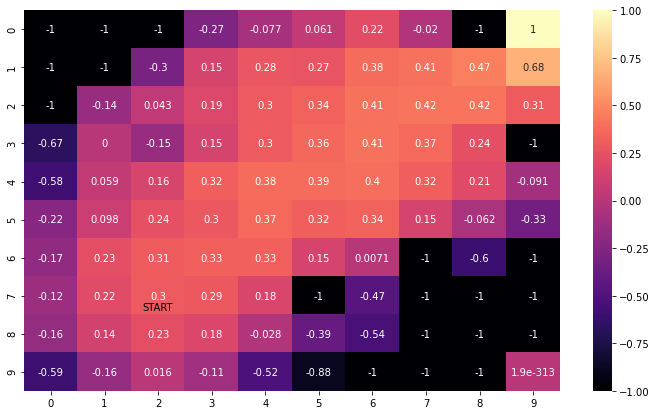

In [399]:
plt.figure(figsize=(12,7))
sns.heatmap(agent.exp_grid, cmap='magma', annot=True)
plt.text(agent.path[0][1]+0.5,agent.path[0][0]-0.2,'START',verticalalignment='center',horizontalalignment='center')
plt.show()

# Example Game

In [430]:
agent.reset()

up


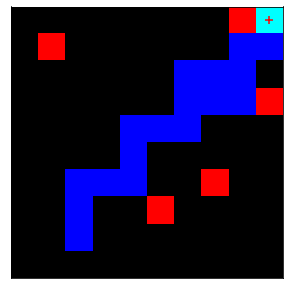

In [449]:
policy = agent.policy()
print(policy)
agent.action(policy)
agent.draw_grid()